In [1]:
# prompt: import file via path /content/sentimentdataset.csv

import pandas as pd

df = pd.read_csv('/content/sentimentdataset.csv')



In [2]:
print(df.columns)  # Check the column names to see if 'Sentiment' is present


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation, special characters, and numbers using regex
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize each word
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a single string
    clean_text = ' '.join(words)
    return clean_text

# Apply the clean_text function to the 'Text' column and create a new column 'Cleaned_Text' in df
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Ensure the original DataFrame columns are preserved
print("Columns after text cleaning:", df.columns)

# Drop rows where 'Sentiment' is NaN (this step should work now)
df_cleaned = df.dropna(subset=['Sentiment'])

# Print a sample to check if 'Sentiment' is preserved
print("Sample data after dropping NaNs in 'Sentiment':")
print(df_cleaned.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns after text cleaning: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Cleaned_Text'],
      dtype='object')
Sample data after dropping NaNs in 'Sentiment':
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twit

In [4]:
print("Columns after text cleaning:", df.columns)


Columns after text cleaning: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Cleaned_Text'],
      dtype='object')


In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


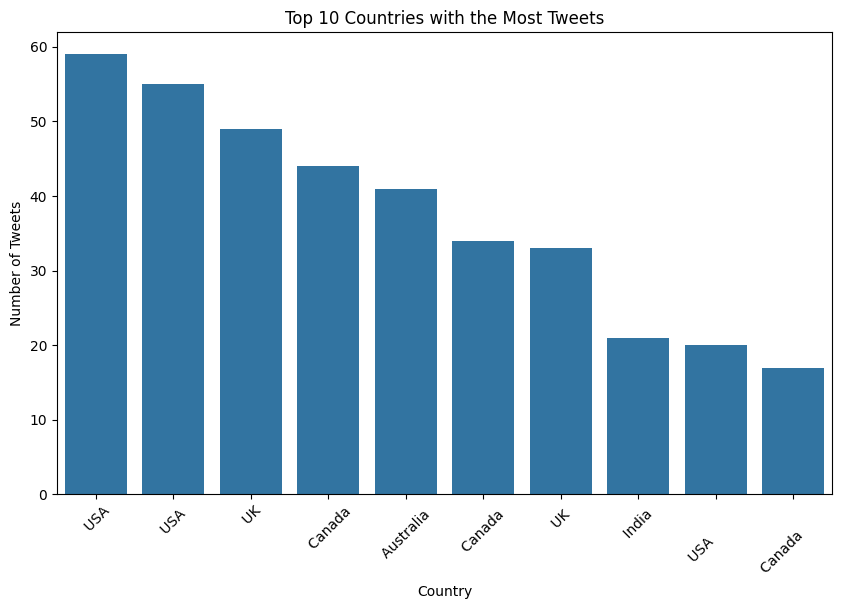

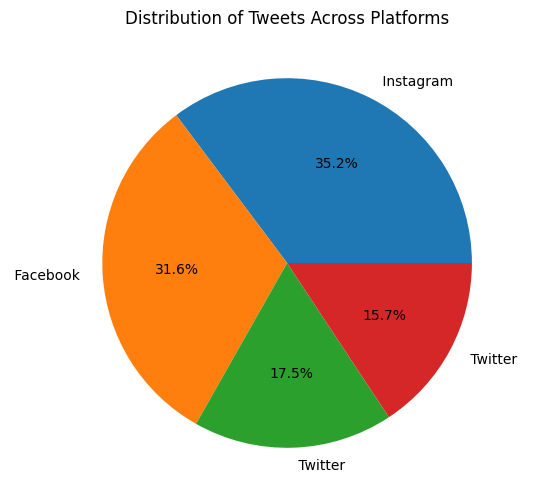

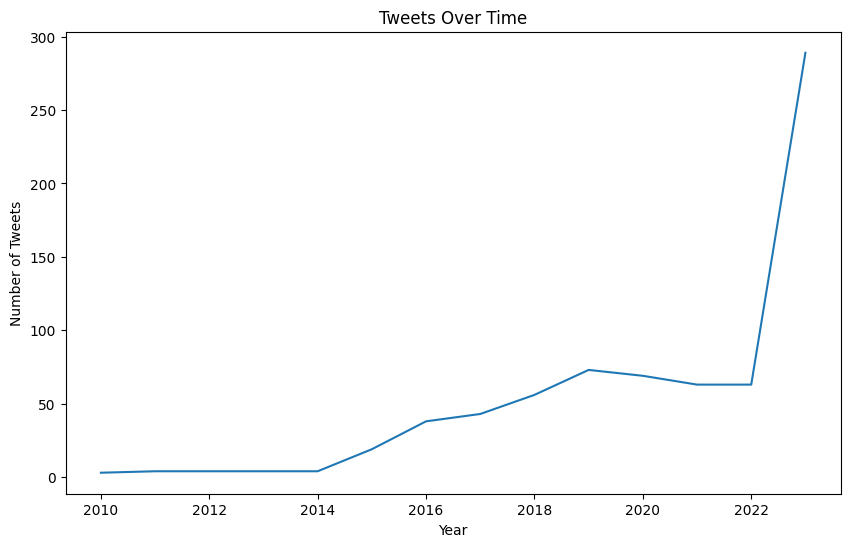

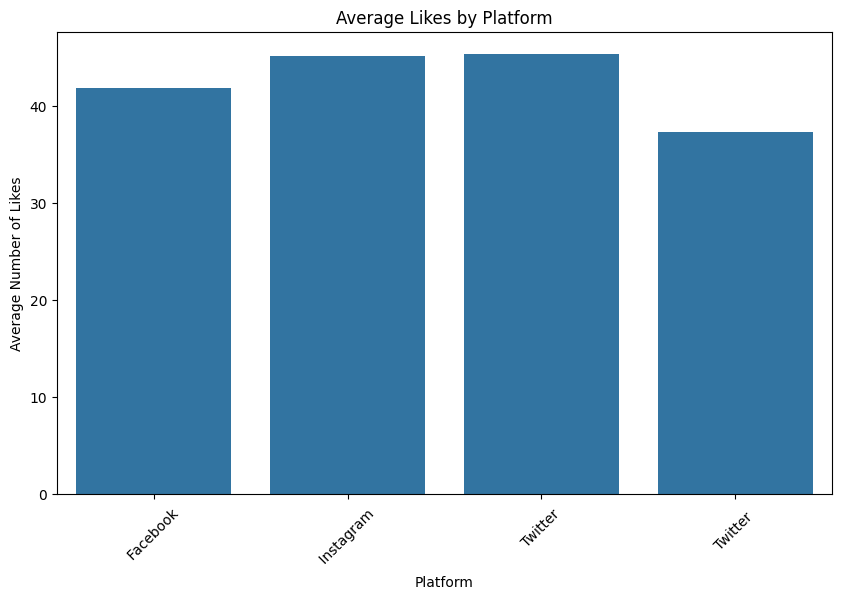

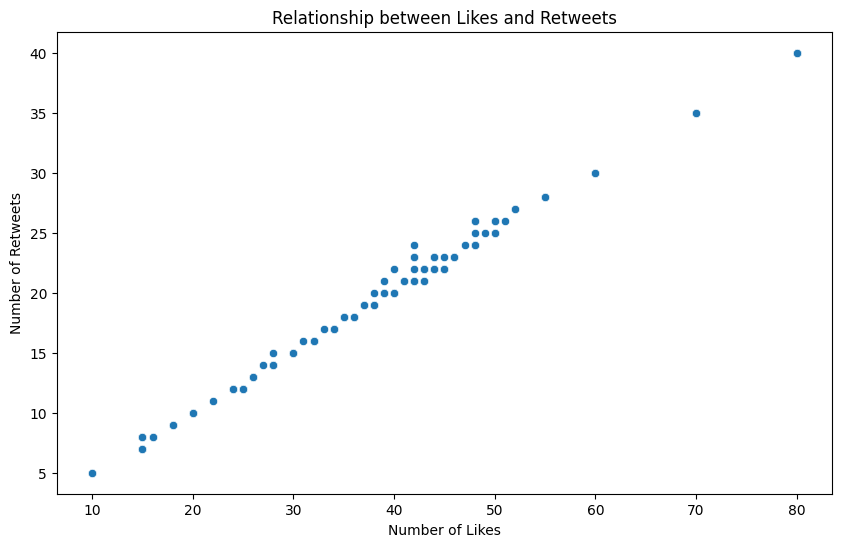

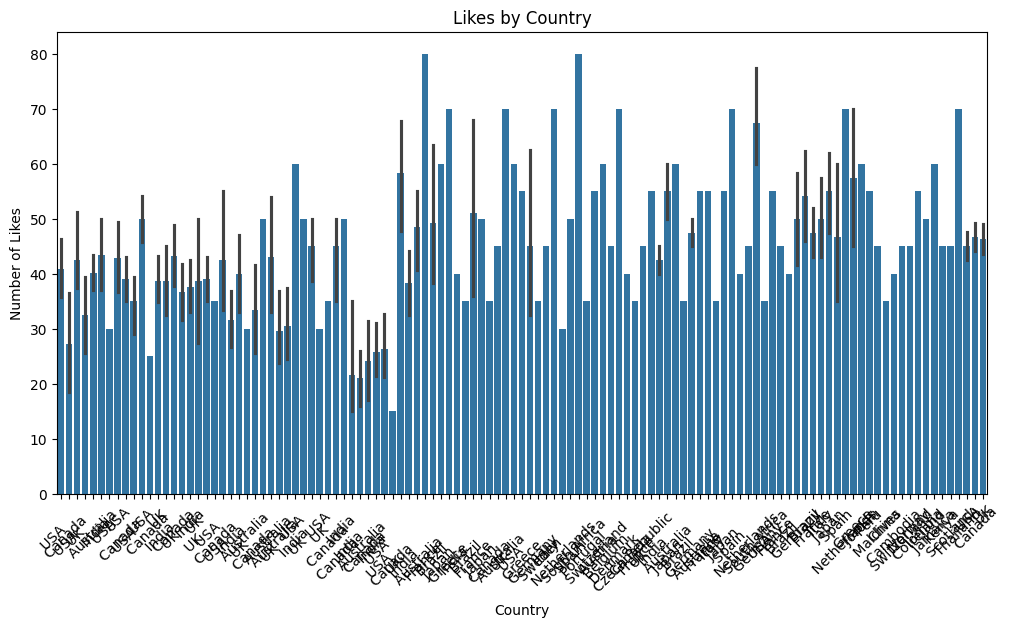

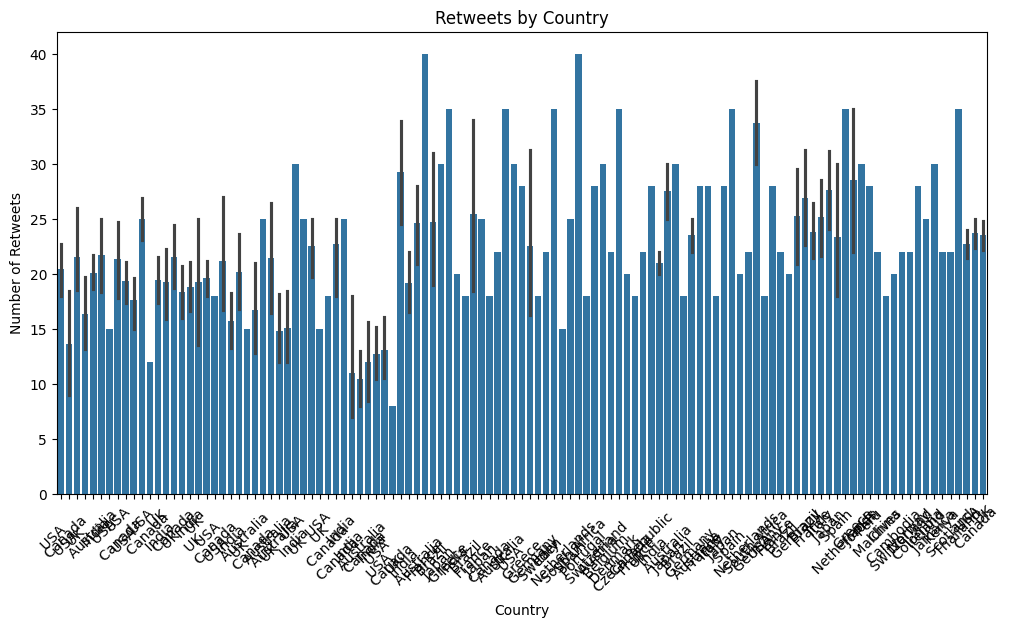

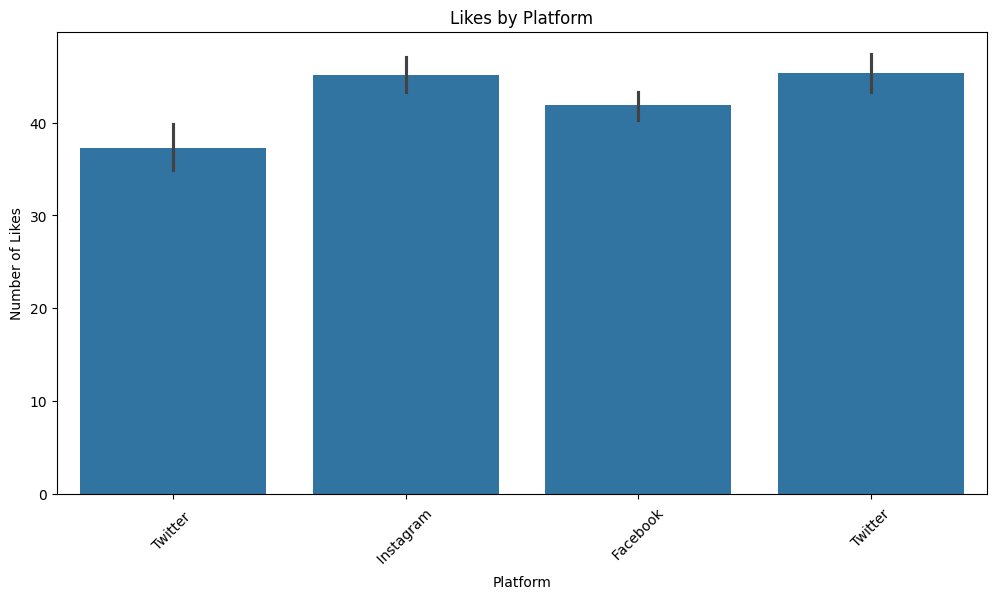

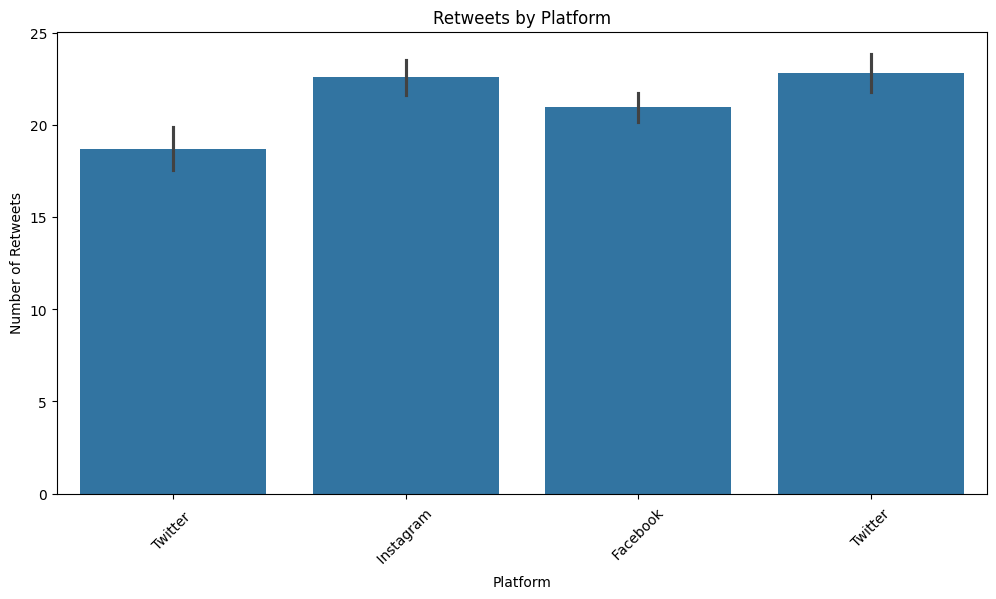

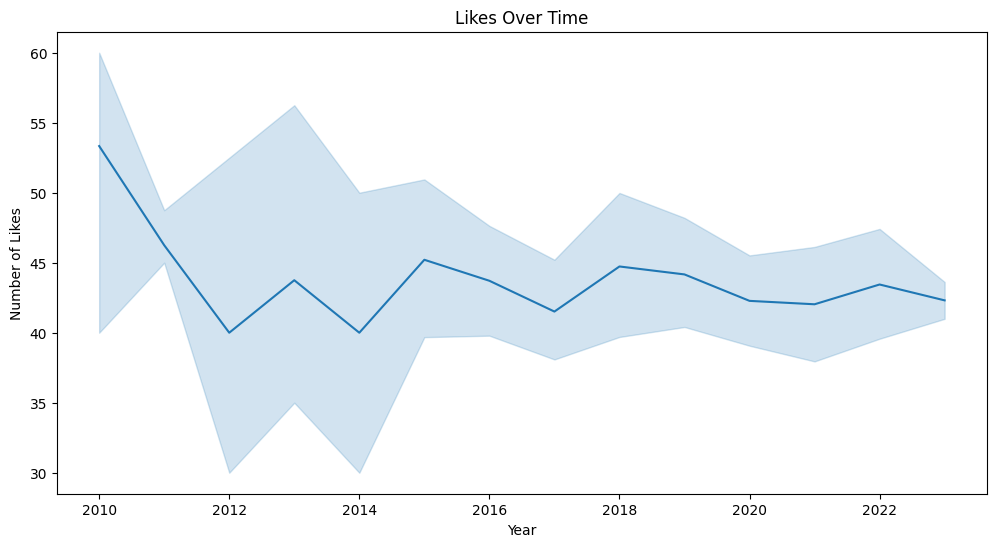

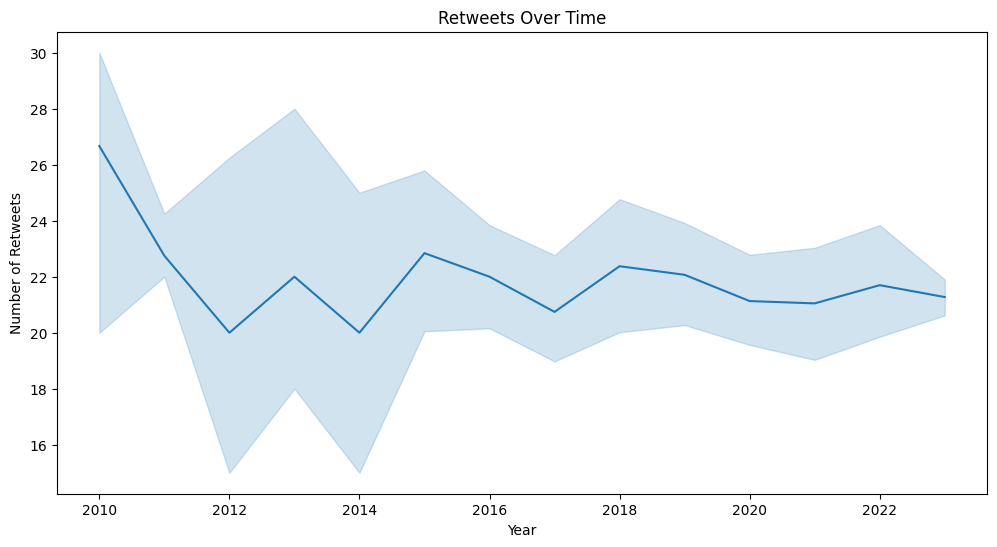

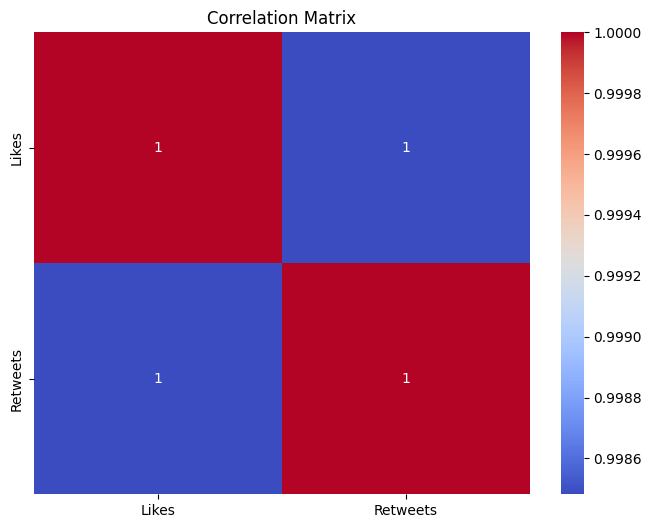

In [6]:
# prompt: do 6-7 eda using country platform likes retweets year

import matplotlib.pyplot as plt
import seaborn as sns


# 4. Top 10 Countries with the Most Tweets
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with the Most Tweets')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of Tweets Across Platforms
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tweets Across Platforms')
plt.show()

# 6. Tweets Over Time (if you have a 'Year' column)
if 'Year' in df.columns:
  year_counts = df['Year'].value_counts().sort_index()
  plt.figure(figsize=(10, 6))
  sns.lineplot(x=year_counts.index, y=year_counts.values)
  plt.title('Tweets Over Time')
  plt.xlabel('Year')
  plt.ylabel('Number of Tweets')
  plt.show()

# 7. Average Likes by Platform (if you want to compare platforms)
platform_avg_likes = df.groupby('Platform')['Likes'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_avg_likes.index, y=platform_avg_likes.values)
plt.title('Average Likes by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Number of Likes')
plt.xticks(rotation=45)
plt.show()


# 3. Relationship between Likes and Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Retweets', data=df)
plt.title('Relationship between Likes and Retweets')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.show()

# 4. Likes and Retweets by Country (if available)
if 'Country' in df.columns:
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Country', y='Likes', data=df)
  plt.title('Likes by Country')
  plt.xlabel('Country')
  plt.ylabel('Number of Likes')
  plt.xticks(rotation=45,)
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.barplot(x='Country', y='Retweets', data=df)
  plt.title('Retweets by Country')
  plt.xlabel('Country')
  plt.ylabel('Number of Retweets')
  plt.xticks(rotation=45,)
  plt.show()

# 5. Likes and Retweets by Platform (if available)
if 'Platform' in df.columns:
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Platform', y='Likes', data=df)
  plt.title('Likes by Platform')
  plt.xlabel('Platform')
  plt.ylabel('Number of Likes')
  plt.xticks(rotation=45,)
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.barplot(x='Platform', y='Retweets', data=df)
  plt.title('Retweets by Platform')
  plt.xlabel('Platform')
  plt.ylabel('Number of Retweets')
  plt.xticks(rotation=45,)
  plt.show()

# 6. Likes and Retweets Over Time (if Year is available)
if 'Year' in df.columns:
  plt.figure(figsize=(12, 6))
  sns.lineplot(x='Year', y='Likes', data=df)
  plt.title('Likes Over Time')
  plt.xlabel('Year')
  plt.ylabel('Number of Likes')
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.lineplot(x='Year', y='Retweets', data=df)
  plt.title('Retweets Over Time')
  plt.xlabel('Year')
  plt.ylabel('Number of Retweets')
  plt.show()

# 7. Correlation Matrix (if applicable)
correlation_matrix = df[['Likes', 'Retweets']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Sample dataframe (replace this with your actual cleaned dataframe)
data = {
    'Cleaned_Text': [
        "enjoying beautiful day park",
        "traffic terrible morning",
        "finished amazing workout",
        "excited upcoming weekend getaway"
    ]
}
df = pd.DataFrame(data)

# Define function to calculate subjectivity and polarity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'Cleaned_Text' column
df['Polarity'], df['Subjectivity'] = zip(*df['Cleaned_Text'].apply(analyze_sentiment))

# Display the updated dataframe
print(df)


                       Cleaned_Text  Polarity  Subjectivity
0       enjoying beautiful day park     0.675          0.80
1          traffic terrible morning    -1.000          1.00
2          finished amazing workout     0.600          0.90
3  excited upcoming weekend getaway     0.375          0.75


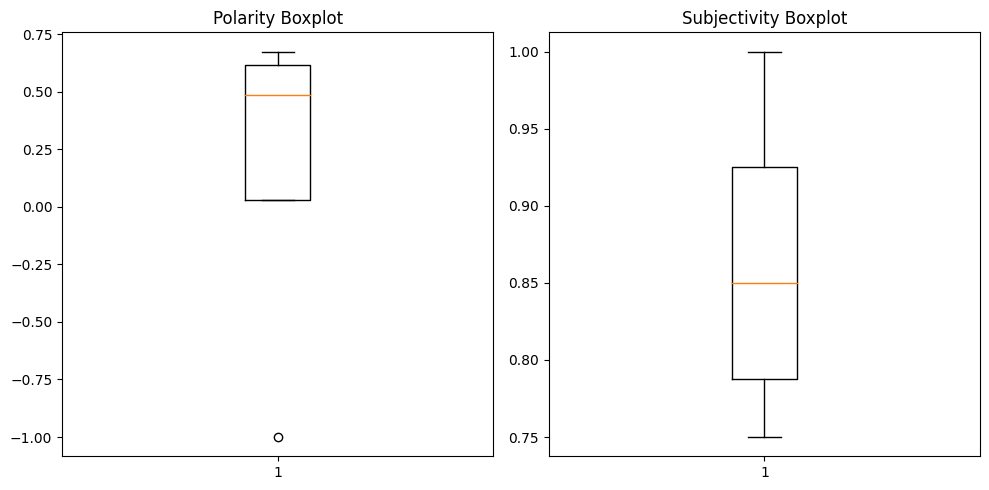

In [8]:
# prompt: check for outlier plot boxplot

import matplotlib.pyplot as plt

# Create boxplots for Polarity and Subjectivity
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Polarity'])
plt.title('Polarity Boxplot')

plt.subplot(1, 2, 2)
plt.boxplot(df['Subjectivity'])
plt.title('Subjectivity Boxplot')

plt.tight_layout()
plt.show()


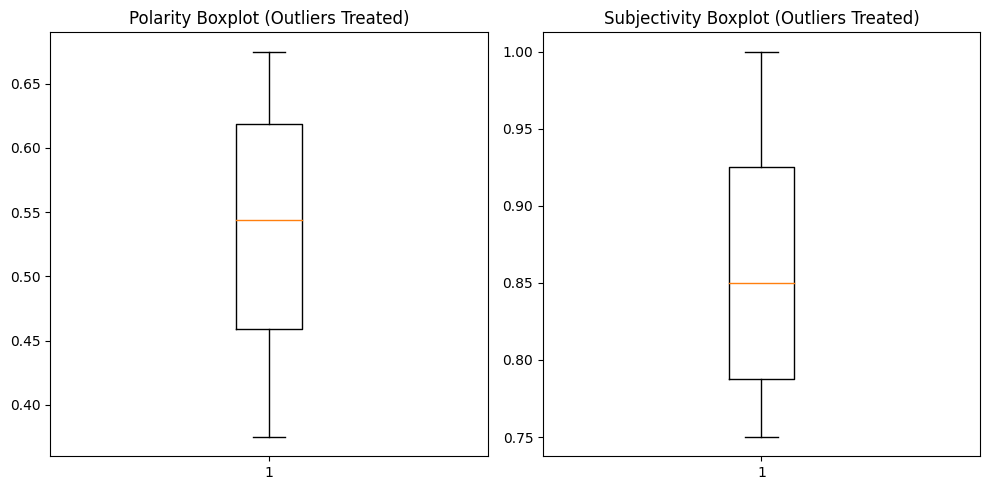

In [9]:
# prompt: treat outlier

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

# Remove outliers for Polarity
df_no_polarity_outliers = remove_outliers_iqr(df, 'Polarity')

# Remove outliers for Subjectivity
df_no_subjectivity_outliers = remove_outliers_iqr(df, 'Subjectivity')


# You can choose to replace outliers with the nearest valid value or the median of the data.

# Example of replacing outliers with the median for Polarity
median_polarity = df['Polarity'].median()
df['Polarity'] = df['Polarity'].apply(lambda x: median_polarity if x < df['Polarity'].quantile(0.25) - 1.5 * (df['Polarity'].quantile(0.75) - df['Polarity'].quantile(0.25)) or x > df['Polarity'].quantile(0.75) + 1.5 * (df['Polarity'].quantile(0.75) - df['Polarity'].quantile(0.25)) else x)

# Example of replacing outliers with the median for Subjectivity
median_subjectivity = df['Subjectivity'].median()
df['Subjectivity'] = df['Subjectivity'].apply(lambda x: median_subjectivity if x < df['Subjectivity'].quantile(0.25) - 1.5 * (df['Subjectivity'].quantile(0.75) - df['Subjectivity'].quantile(0.25)) or x > df['Subjectivity'].quantile(0.75) + 1.5 * (df['Subjectivity'].quantile(0.75) - df['Subjectivity'].quantile(0.25)) else x)


# Create boxplots after treating outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Polarity'])
plt.title('Polarity Boxplot (Outliers Treated)')

plt.subplot(1, 2, 2)
plt.boxplot(df['Subjectivity'])
plt.title('Subjectivity Boxplot (Outliers Treated)')

plt.tight_layout()
plt.show()



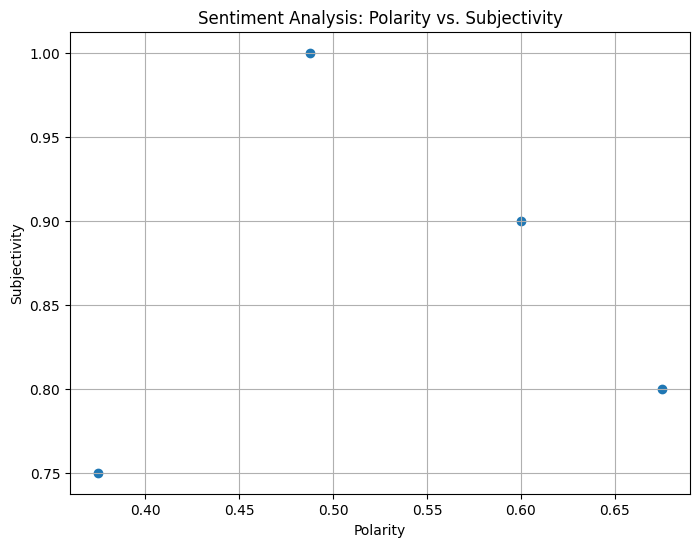

In [10]:
# prompt: scatterplot,

import matplotlib.pyplot as plt

# Create a scatter plot of Polarity vs. Subjectivity
plt.figure(figsize=(8, 6))
plt.scatter(df['Polarity'], df['Subjectivity'])
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis: Polarity vs. Subjectivity')
plt.grid(True)
plt.show()


In [11]:
# prompt: covariance and co-relation,

# Calculate the covariance matrix
covariance_matrix = df[['Polarity', 'Subjectivity']].cov()
print("Covariance Matrix:\n", covariance_matrix)

# Calculate the correlation matrix
correlation_matrix = df[['Polarity', 'Subjectivity']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Covariance Matrix:
               Polarity  Subjectivity
Polarity      0.017227      0.001719
Subjectivity  0.001719      0.012292

Correlation Matrix:
               Polarity  Subjectivity
Polarity      1.000000      0.118116
Subjectivity  0.118116      1.000000


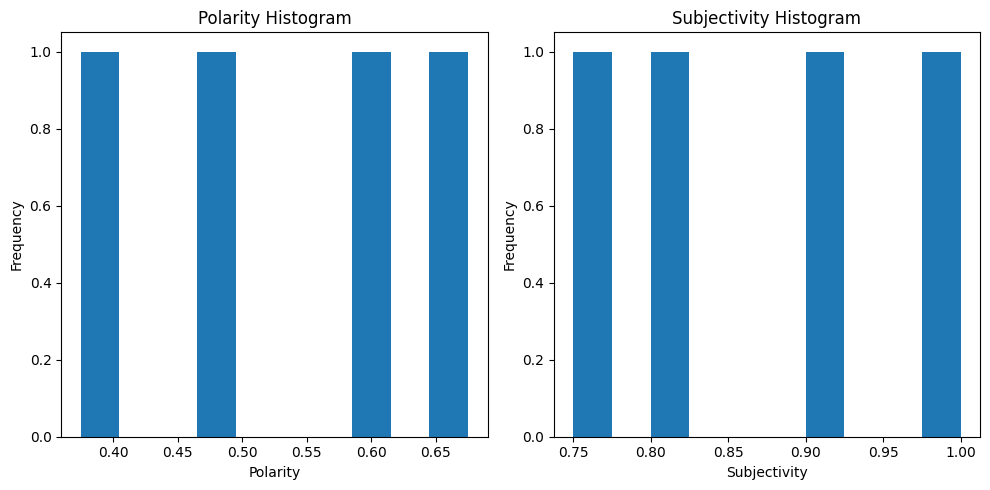

In [12]:
# prompt: histogram,

# Create histograms for Polarity and Subjectivity
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Polarity'], bins=10)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity Histogram')

plt.subplot(1, 2, 2)
plt.hist(df['Subjectivity'], bins=10)
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Subjectivity Histogram')

plt.tight_layout()
plt.show()


In [13]:
# prompt: create bag of words and idf tokenizwer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a Bag-of-Words model
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['Cleaned_Text'])

# Print the vocabulary and the BOW matrix
print("Vocabulary:", vectorizer.vocabulary_)
print("Bag-of-Words Matrix:\n", bow_matrix.toarray())

# Create a TF-IDF model
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Print the vocabulary and the TF-IDF matrix
print("\nVocabulary:", tfidf_vectorizer.vocabulary_)
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


Vocabulary: {'enjoying': 3, 'beautiful': 1, 'day': 2, 'park': 8, 'traffic': 10, 'terrible': 9, 'morning': 7, 'finished': 5, 'amazing': 0, 'workout': 13, 'excited': 4, 'upcoming': 11, 'weekend': 12, 'getaway': 6}
Bag-of-Words Matrix:
 [[0 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 1 1 0]]

Vocabulary: {'enjoying': 3, 'beautiful': 1, 'day': 2, 'park': 8, 'traffic': 10, 'terrible': 9, 'morning': 7, 'finished': 5, 'amazing': 0, 'workout': 13, 'excited': 4, 'upcoming': 11, 'weekend': 12, 'getaway': 6}
TF-IDF Matrix:
 [[0.         0.5        0.5        0.5        0.         0.
  0.         0.         0.5        0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.57735027 0.         0.57735027 0.57735027 0.
  0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.57735027
  0.         0.         0.         0.         0.      

In [14]:
# prompt: word frequency of 10 most commonly used words in table

from collections import Counter

# Combine all cleaned text into a single string
all_words = ' '.join(df['Cleaned_Text']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Create a table (DataFrame)
word_frequency_table = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Display the table
print(word_frequency_table)


        Word  Frequency
0   enjoying          1
1  beautiful          1
2        day          1
3       park          1
4    traffic          1
5   terrible          1
6    morning          1
7   finished          1
8    amazing          1
9    workout          1


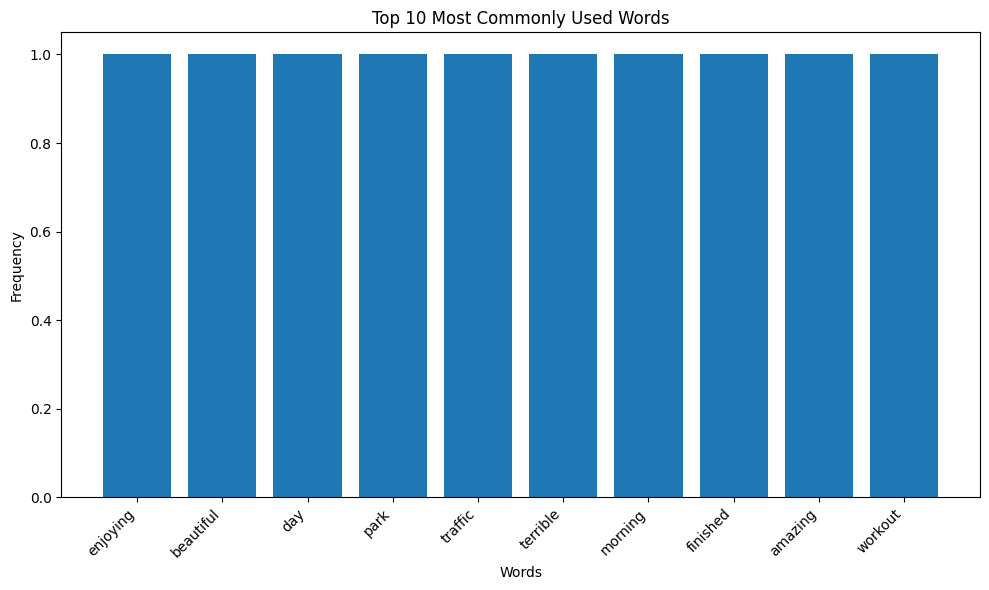

In [15]:
# prompt: plot bar chart of 10 most commonly used words

import matplotlib.pyplot as plt

# Assuming you have the 'word_frequency_table' DataFrame as calculated in the previous code

# Extract words and frequencies
words = word_frequency_table['Word'].tolist()
frequencies = word_frequency_table['Frequency'].tolist()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Commonly Used Words')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


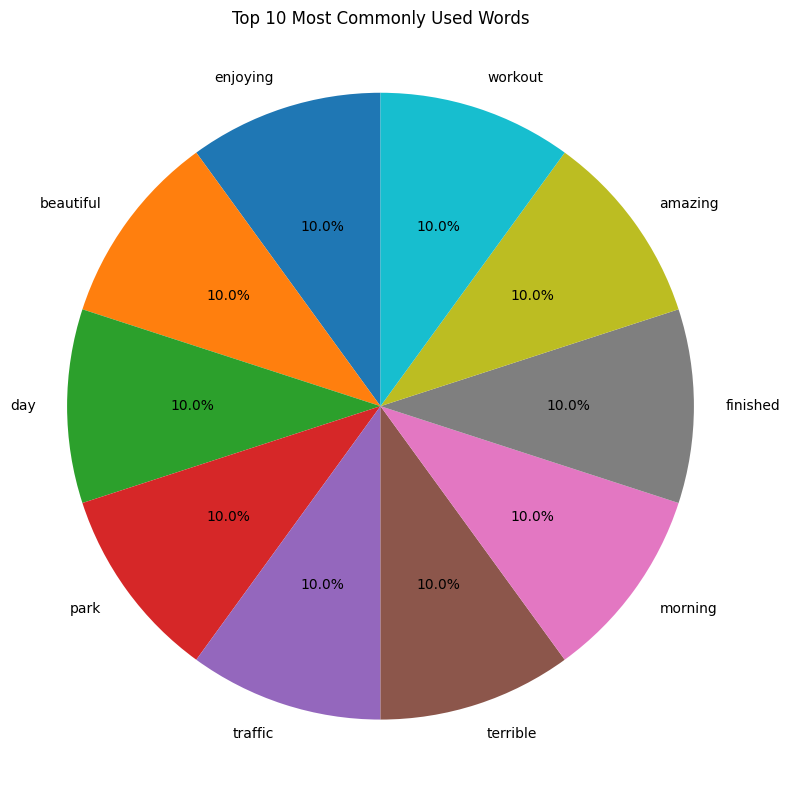

In [16]:
# prompt: piechart

# Assuming you have the 'word_frequency_table' DataFrame as calculated in the previous code

# Extract words and frequencies
words = word_frequency_table['Word'].tolist()
frequencies = word_frequency_table['Frequency'].tolist()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(frequencies, labels=words, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 Most Commonly Used Words')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


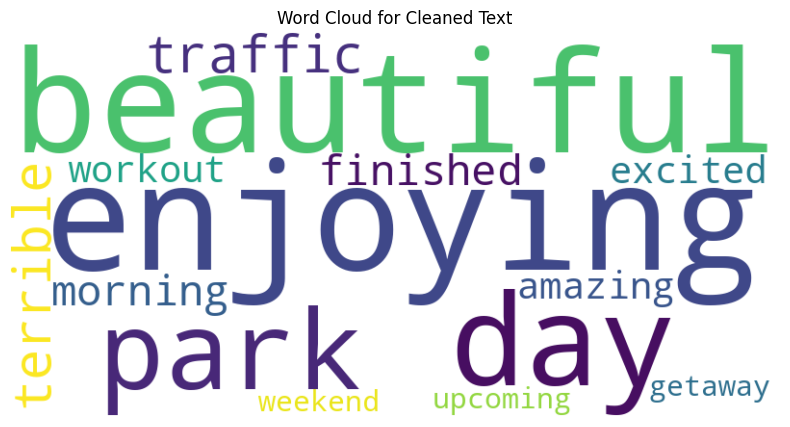

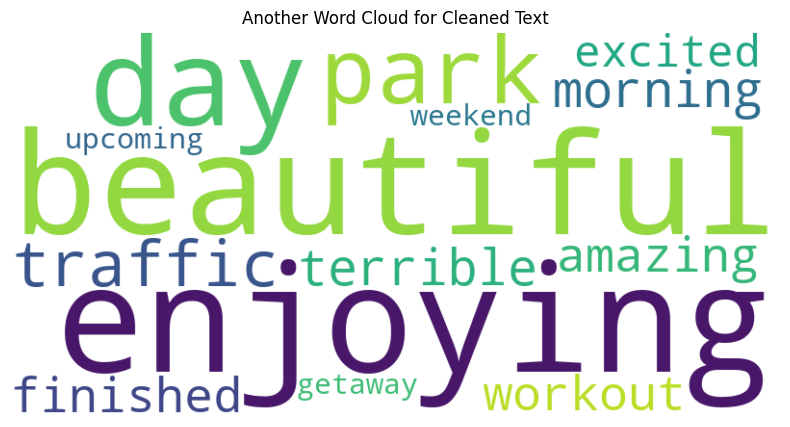

In [26]:
# prompt: do 2 word cloud for cleaned text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
all_cleaned_text = " ".join(df['Cleaned_Text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Cleaned Text')
plt.show()


# Create another word cloud using different parameters (e.g., colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_cleaned_text)

# Display the second word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Another Word Cloud for Cleaned Text')
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can change max_features to control the number of features

# Fit and transform the cleaned text
# Use 'Cleaned_Text' instead of 'cleaned_text'
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert the result to a DataFrame to see the term-document matrix
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the vectorized data
tfidf_df.head()

,amazing,beautiful,day,enjoying,excited,finished,getaway,morning,park,terrible,traffic,upcoming,weekend,workout
0,0.00000,0.5,0.5,0.5,0.0,0.00000,0.0,0.00000,0.5,0.00000,0.00000,0.0,0.0,0.00000
1,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.57735,0.0,0.57735,0.57735,0.0,0.0,0.00000
2,0.57735,0.0,0.0,0.0,0.0,0.57735,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.57735
3,0.00000,0.0,0.0,0.0,0.5,0.00000,0.5,0.00000,0.0,0.00000,0.00000,0.5,0.5,0.00000


In [20]:
df.head()

,Cleaned_Text,Polarity,Subjectivity
0,enjoying beautiful day park,0.6750,0.80
1,traffic terrible morning,0.4875,1.00
2,finished amazing workout,0.6000,0.90
3,excited upcoming weekend getaway,0.3750,0.75


In [21]:
# prompt: Sentiment analysis using Gradient Boosting machines

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X = df_cleaned['Cleaned_Text']
y = df_cleaned['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_vec)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.2585034013605442
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
            Adventure        0.00      0.00      0.00         0
         Affection           1.00      1.00      1.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      1.00      1.00         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
               Awe           0.00      0.00      0.00         0
         Awe                 0.00      0.00      0.00         1
        Aw

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [22]:
# Function to predict sentiment for new text input
def predict_sentiment(new_text, model, vectorizer): # Removed label_encoder argument
    # Clean the input text using the same cleaning function
    cleaned_text = clean_text(new_text)

    # Vectorize the cleaned text using the fitted TfidfVectorizer
    vectorized_text = vectorizer.transform([cleaned_text])

    # Predict the sentiment using the trained logistic regression model
    sentiment = model.predict(vectorized_text)

    return sentiment[0] # Removed label_encoder.inverse_transform

# Example usage
new_text = "I absolutely love this product, it's amazing!"
predicted_sentiment = predict_sentiment(new_text, gb_model, vectorizer) # Changed model to gb_model

print(f"The predicted sentiment for the text is: {predicted_sentiment}")

The predicted sentiment for the text is:  Joy 
